In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

<h2>04. 01. 2025.</h2>

<h2 style = "color:blue">FWHM = 600 km</h2>

<h3>Continuum</h3>

In [5]:
Vx0 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy0 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
#Vx0 = Vx0[::3]
#Vy0 = Vy0[::3]
Vx0 = Vx0.transpose(0, 2, 1)
Vy0 = Vy0.transpose(0, 2, 1)

In [6]:
Vx0_mean = temporal_avg(Vx0, 0, 90)
Vx0_mean = Vx0_mean/1E5
Vy0_mean = temporal_avg(Vy0, 0, 90)
Vy0_mean = Vy0_mean/1E5

In [7]:
Vx0_filtered600 = gaussian_filter(Vx0_mean, 22.5, mode = "wrap")
Vy0_filtered600 = gaussian_filter(Vy0_mean, 22.5, mode = "wrap")

In [8]:
Vx_lw_cont = fits.open("lw_fwhm_600_dt_30_tracked_35.fits")[0].data
Vy_lw_cont = fits.open("lw_fwhm_600_dt_30_tracked_35.fits")[1].data

In [9]:
Vx_lw_cont_mean = temporal_avg(Vx_lw_cont, 0, 90)
Vy_lw_cont_mean = temporal_avg(Vy_lw_cont, 0, 90)

In [10]:
Rx_log0_600 = pearsonr(Vx_lw_cont_mean.flatten(), Vx0_filtered600.flatten())
print(Rx_log0_600)

PearsonRResult(statistic=0.9122337286286232, pvalue=0.0)


In [11]:
Ry_log0_600 = pearsonr(Vy_lw_cont_mean.flatten(), Vy0_filtered600.flatten())
print(Ry_log0_600)

PearsonRResult(statistic=0.9276095877598826, pvalue=0.0)


<h3>Wing</h3>

In [12]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
#Vxm1 = Vxm1[::3]
#Vym1 = Vym1[::3]
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [13]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
Vym1_mean = Vym1_mean/1E5

In [14]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5, mode = "wrap")

In [15]:
Vx_lw_wing = fits.open("lw_fwhm_600_dt_30_tracked_62.fits")[0].data
Vy_lw_wing = fits.open("lw_fwhm_600_dt_30_tracked_62.fits")[1].data

In [16]:
Vx_lw_wing_mean = temporal_avg(Vx_lw_wing, 0, 90)
Vy_lw_wing_mean = temporal_avg(Vy_lw_wing, 0, 90)

In [17]:
Rx_logm1_600 = pearsonr(Vx_lw_wing_mean.flatten(), Vxm1_filtered600.flatten())
print(Rx_logm1_600)

PearsonRResult(statistic=0.6311583470642985, pvalue=0.0)


In [18]:
Ry_logm1_600 = pearsonr(Vy_lw_wing_mean.flatten(), Vym1_filtered600.flatten())
print(Ry_logm1_600)

PearsonRResult(statistic=0.6203277555114173, pvalue=0.0)


<h3>Core</h3>

In [19]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
#Vxm3 = Vxm3[::3]
#Vym3 = Vym3[::3]
Vxm3 = Vxm3.transpose(0, 2, 1)
Vym3 = Vym3.transpose(0, 2, 1)

In [20]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
Vxm3_mean = Vxm3_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
Vym3_mean = Vym3_mean/1E5

In [21]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5, mode = "wrap")

In [22]:
Vx_lw_core = fits.open("lw_fwhm_600_dt_30_tracked_68.fits")[0].data
Vy_lw_core = fits.open("lw_fwhm_600_dt_30_tracked_68.fits")[1].data

In [23]:
Vx_lw_core_mean = temporal_avg(Vx_lw_core, 0, 90)
Vy_lw_core_mean = temporal_avg(Vy_lw_core, 0, 90)

In [24]:
Rx_logm3_600 = pearsonr(Vx_lw_core_mean.flatten(), Vxm3_filtered600.flatten())
print(Rx_logm3_600)

PearsonRResult(statistic=0.015651136601835255, pvalue=1.0218449093908547e-127)


In [25]:
Ry_logm3_600 = pearsonr(Vy_lw_core_mean.flatten(), Vym3_filtered600.flatten())
print(Ry_logm3_600)

PearsonRResult(statistic=0.005284544682205702, pvalue=4.774042081572525e-16)


In [26]:
from scipy.stats import linregress

In [27]:
Vx9999 = fits.open("Velocities_TAU_1_0.fits")[1].data
Vx9999 = Vx9999.transpose(0, 2, 1)
Vx9 = temporal_avg(Vx9999, 0, 90)
Vx89 = gaussian_filter(Vx9, 22.5, mode = "wrap")

In [28]:
print(pearsonr(Vx89.flatten(), Vx_lw_cont_mean.flatten()))

PearsonRResult(statistic=0.9122337286168992, pvalue=0.0)


/tmp/ipykernel_8445/1096861633.py:83: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_8445/1096861633.py:84: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("600km.png", dpi = 100, bbox_inches = 'tight')
/home/mistflow/anaconda3/envs/flct/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


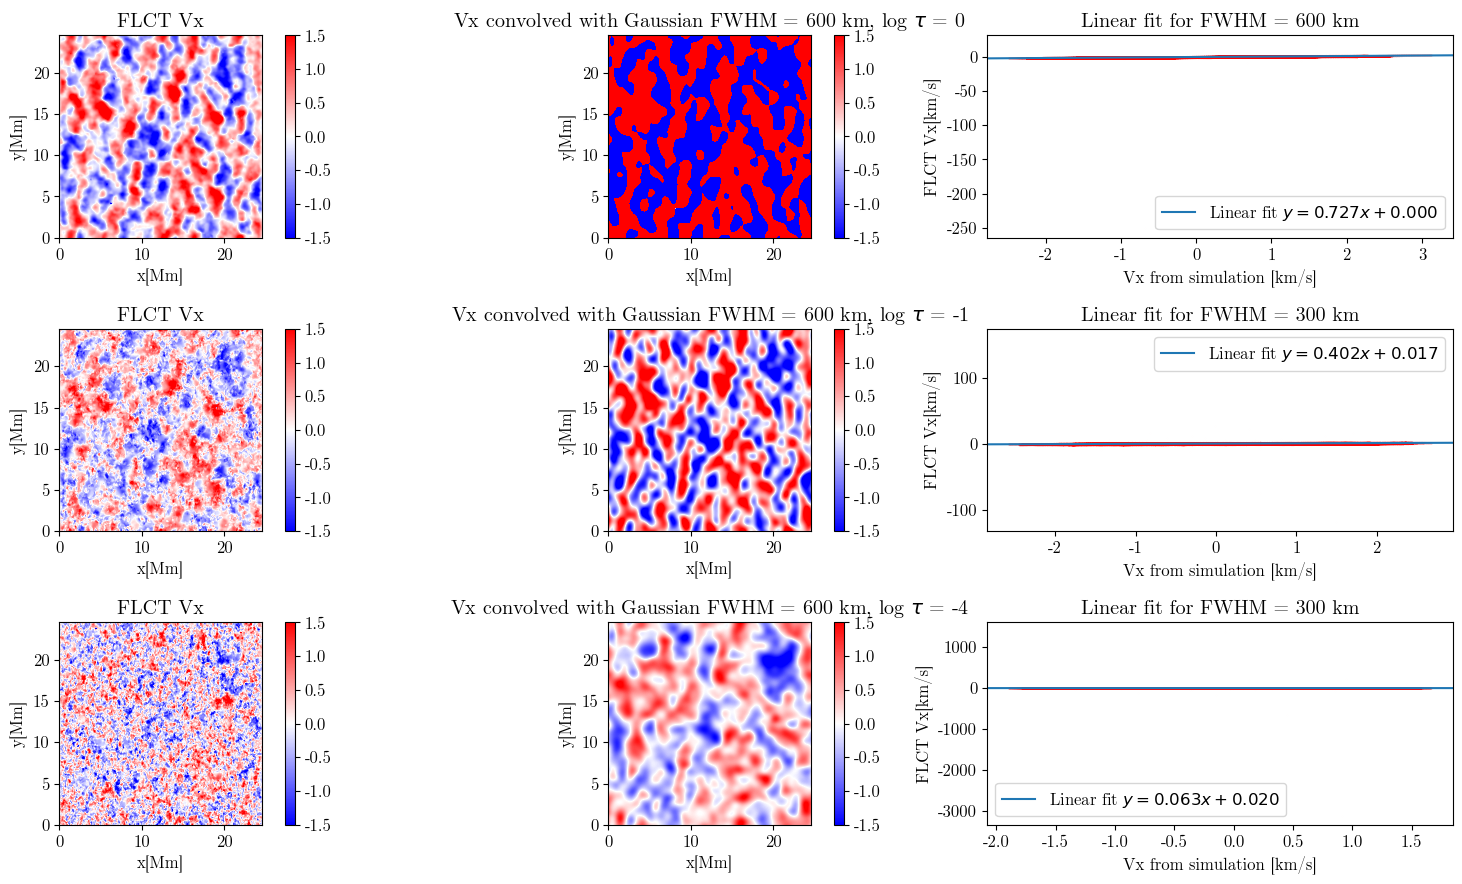

In [29]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (16,9))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(331)
ax1.set_title("FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_lw_cont_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(332)
ax2.set_title("Vx convolved with Gaussian FWHM = 600 km, log $\\tau$ = 0")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx89[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(333)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx0_filtered600.flatten(), Vx_lw_cont_mean.flatten(), s = 0.001, alpha = 0.05, color="red")
m1, b1, *_ = linregress(Vx0_filtered600.flatten(), Vx_lw_cont_mean.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
plt.legend()

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(334)
ax4.set_title("FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_lw_wing_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(335)
ax5.set_title("Vx convolved with Gaussian FWHM = 600 km, log $\\tau$ = -1")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vxm1_filtered600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(336)
ax6.set_title("Linear fit for FWHM = 300 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vxm1_filtered600.flatten(), Vx_lw_wing_mean.flatten(), s = 0.001, alpha = 0.05, color="red")
m2, b2, *_ = linregress(Vxm1_filtered600.flatten(), Vx_lw_wing_mean.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()

#ax4 = plt.subplot2grid((4,3), (1,0))
ax7 = f.add_subplot(337)
ax7.set_title("FLCT Vx")
ax7.set_xlabel("x[Mm]")
ax7.set_ylabel("y[Mm]")
im7 = ax7.imshow(Vx_lw_core_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im7)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax8 = f.add_subplot(338)
ax8.set_title("Vx convolved with Gaussian FWHM = 600 km, log $\\tau$ = -4")
ax8.set_xlabel("x[Mm]")
ax8.set_ylabel("y[Mm]")
im8 = ax8.imshow(Vxm3_filtered600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im8)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax9 = f.add_subplot(339)
ax9.set_title("Linear fit for FWHM = 300 km")                                
ax9.set_ylabel("FLCT Vx[km/s]")
ax9.set_xlabel("Vx from simulation [km/s]")
ax9.scatter(Vxm3_filtered600.flatten(), Vx_lw_core_mean.flatten(), s = 0.001, alpha = 0.05, color="red")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_lw_core_mean.flatten())
ax9.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()

plt.tight_layout()
plt.savefig("600km.png", dpi = 100, bbox_inches = 'tight')

<h3>Let's use "correct" pixel values</h3>

In [30]:
# Referent Muram velocity:

def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [31]:
Vx_lw_cont_cor = mean_v_from_file("lw_fwhm_600_dt_30_tracked_35.fits")

In [32]:
Vx_lw_wing_cor = mean_v_from_file("lw_fwhm_600_dt_30_tracked_62.fits")

In [33]:
Vx_lw_core_cor = mean_v_from_file("lw_fwhm_600_dt_30_tracked_68.fits")

In [34]:
def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [35]:
Vy_lw_cont_cor = mean_vy_from_file("lw_fwhm_600_dt_30_tracked_35.fits")

In [36]:
Vy_lw_wing_cor = mean_vy_from_file("lw_fwhm_600_dt_30_tracked_62.fits")

In [37]:
Vy_lw_core_cor = mean_vy_from_file("lw_fwhm_600_dt_30_tracked_68.fits")

In [38]:
Rx_log0_600cor = pearsonr(Vx_lw_cont_cor.flatten(), Vx0_filtered600.flatten())
print(Rx_log0_600cor)

PearsonRResult(statistic=0.9348419990862635, pvalue=0.0)


In [39]:
Ry_log0_600cor = pearsonr(Vy_lw_cont_cor.flatten(), Vy0_filtered600.flatten())
print(Ry_log0_600cor)

PearsonRResult(statistic=0.9294099042848294, pvalue=0.0)


In [40]:
Rx_logm1_600cor = pearsonr(Vx_lw_wing_cor.flatten(), Vxm1_filtered600.flatten())
print(Rx_logm1_600cor)

PearsonRResult(statistic=0.6487493497348628, pvalue=0.0)


In [41]:
Ry_logm1_600cor = pearsonr(Vy_lw_wing_cor.flatten(), Vym1_filtered600.flatten())
print(Ry_logm1_600cor)

PearsonRResult(statistic=0.6258684688112415, pvalue=0.0)


In [42]:
Rx_logm3_600cor = pearsonr(Vx_lw_core_cor.flatten(), Vxm3_filtered600.flatten())
print(Rx_logm3_600cor)

PearsonRResult(statistic=0.057227486975516176, pvalue=0.0)


In [43]:
Ry_logm3_600cor = pearsonr(Vy_lw_core_cor.flatten(), Vym3_filtered600.flatten())
print(Ry_logm3_600cor)

PearsonRResult(statistic=0.014330136615563534, pvalue=2.200106239208292e-107)


/tmp/ipykernel_8445/777639202.py:83: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_8445/777639202.py:84: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("600km_corr.png", dpi = 100, bbox_inches = 'tight')


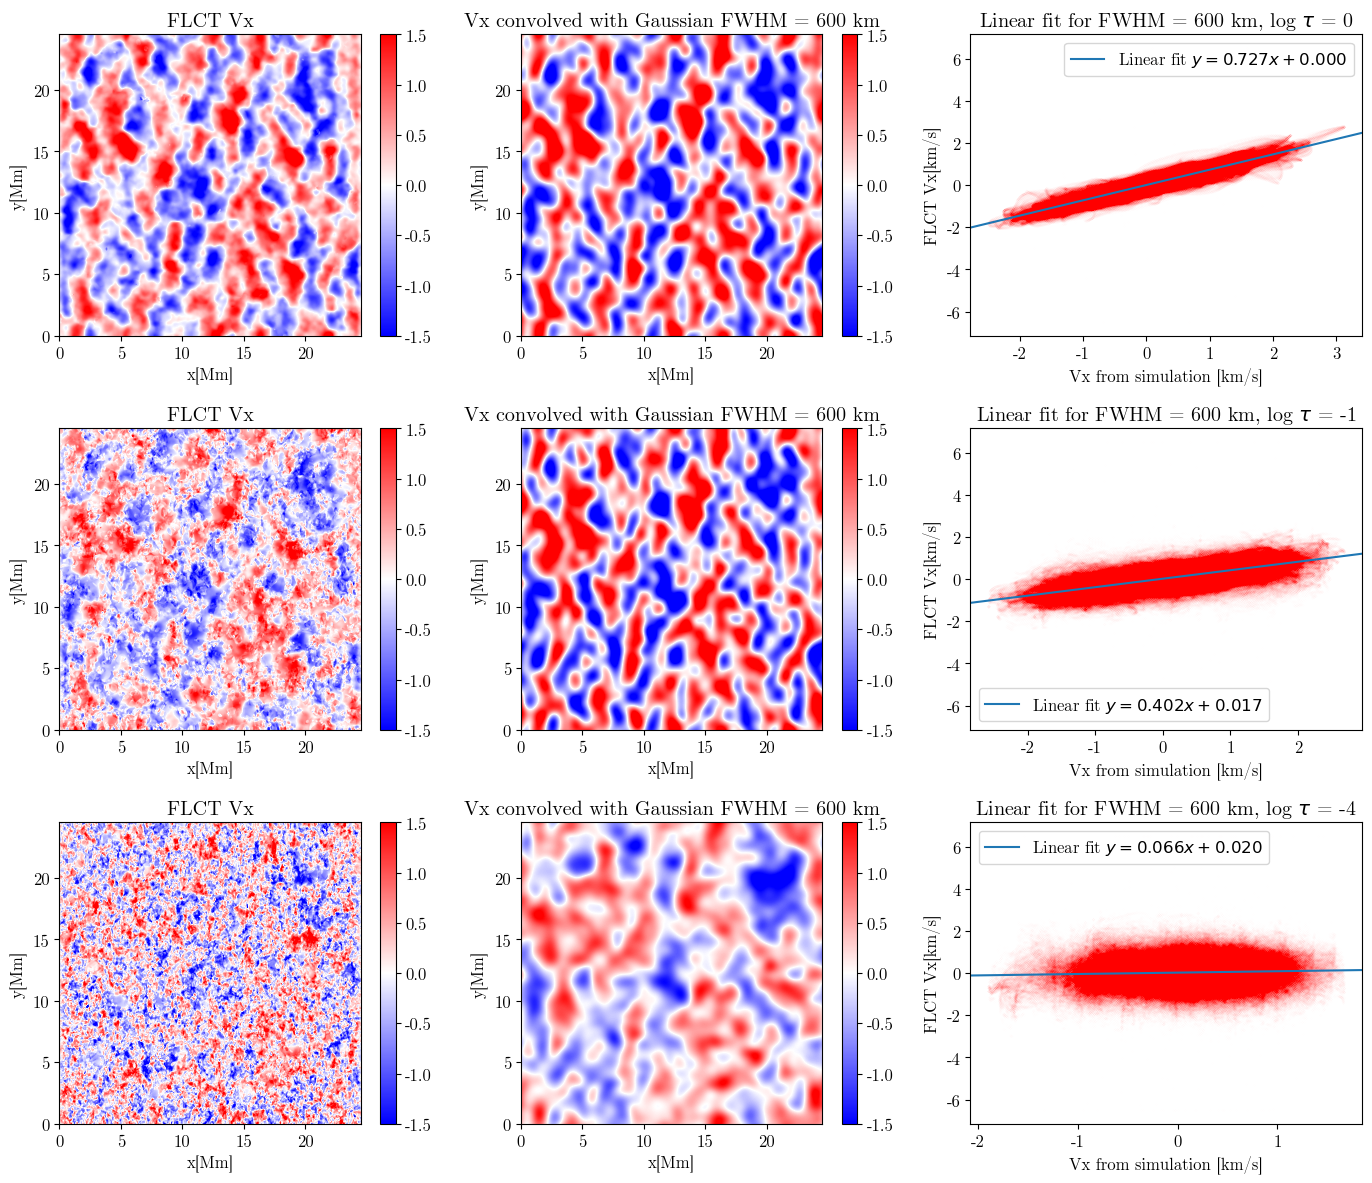

In [44]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,12))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(331)
ax1.set_title("FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_lw_cont_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(332)
ax2.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx0_filtered600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(333)
ax3.set_title("Linear fit for FWHM = 600 km, log $\\tau$ = 0")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx0_filtered600.flatten(), Vx_lw_cont_cor.flatten(), s = 0.001, alpha = 0.05, color="red")
m1, b1, *_ = linregress(Vx0_filtered600.flatten(), Vx_lw_cont_cor.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
plt.legend()

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(334)
ax4.set_title("FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_lw_wing_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(335)
ax5.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vxm1_filtered600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(336)
ax6.set_title("Linear fit for FWHM = 600 km, log $\\tau$ = -1")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vxm1_filtered600.flatten(), Vx_lw_wing_cor.flatten(), s = 0.001, alpha = 0.05, color="red")
m2, b2, *_ = linregress(Vxm1_filtered600.flatten(), Vx_lw_wing_cor.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()

#ax4 = plt.subplot2grid((4,3), (1,0))
ax7 = f.add_subplot(337)
ax7.set_title("FLCT Vx")
ax7.set_xlabel("x[Mm]")
ax7.set_ylabel("y[Mm]")
im7 = ax7.imshow(Vx_lw_core_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im7)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax8 = f.add_subplot(338)
ax8.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax8.set_xlabel("x[Mm]")
ax8.set_ylabel("y[Mm]")
im8 = ax8.imshow(Vxm3_filtered600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im8)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax9 = f.add_subplot(339)
ax9.set_title("Linear fit for FWHM = 600 km, log $\\tau$ = -4")                                
ax9.set_ylabel("FLCT Vx[km/s]")
ax9.set_xlabel("Vx from simulation [km/s]")
ax9.scatter(Vxm3_filtered600.flatten(), Vx_lw_core_cor.flatten(), s = 0.001, alpha = 0.05, color="red")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_lw_core_cor.flatten())
ax9.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()

plt.tight_layout()
plt.savefig("600km_corr.png", dpi = 100, bbox_inches = 'tight')